# Lack of robustness in Markovitz Procedure

Although the promise of the Markowitz procedure is exciting, in tends to fall apart in practice. The problem is that we rarely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error, and we'll see that the procedure is highly sensitive to these errors, which tend to get exaggerated in the portfolio.

In [1]:
import pandas as pd
import numpy as np
import portfolio_tool_kit as ptk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ind = ptk.get_ind_returns()
er = ptk.annualized_ret(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

Let's take a 2 asset portfolio

In [7]:
l = ["Food","Steel"]
ptk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

Let's look at the returns of the two assets that dictated those weights

In [8]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Now assume that we had a really good estimator, and we were off by only a fraction of a percent in our estimate, and we had estimated a return of 11 and 12 percent respectively for Food and Steel

In [12]:
ptk.msr(0.1, np.array([0.11,0.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

Note that the msr value changes even for a fraction of change in estimation. What if we had estimated 10, 13

In [13]:
ptk.msr(0.1, np.array([0.10, 0.13]), cov.loc[l,l])

array([0., 1.])

And if we had made the same estimation error, but the error went the other way (13% and 10%)?

In [14]:
ptk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l,l])

array([1., 0.])

## How to avoid estimation errors?

Let's first plot the ef again

<AxesSubplot:xlabel='Volatility'>

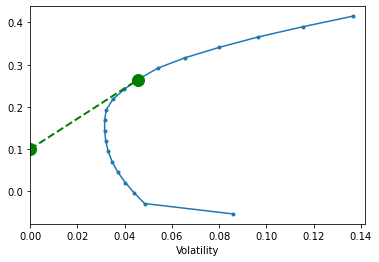

In [26]:
ptk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

One way to avoid this estimation game is to skip the entire process and just rely on naive diversification, which means hold all stocks with equal weight.

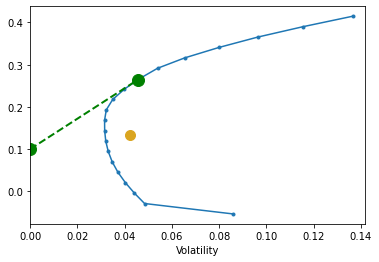

In [27]:
ax = ptk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)
ax.set_xlim(left = 0)
n = er.shape[0]
w_ew = np.repeat(1/n, n)
r_ew = ptk.portfolio_ret(w_ew, er)
vol_ew = ptk.portfolio_vol(w_ew, cov)
# add EW
ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)

Researchers have shown that the EW portfolio is a remarkably good portfolio to hold. In fact, there is overwhelming siupport for the idea that it is a far better portfolio to hold than a cap-weighted equivalent.

## GMV

However, there is another point on the efficient frontier that is very interesting. This is the nose of the hull, which is the portfolio of lowest volatility across all possible portfolios. This is called the Minimum Volatility or the Global Minimum Volatility or GMV portfolio.

The interesting thing about it is that if you assume that all returns are the same, the optimizer cannot improve the sharpe ratio through raising returns, and so it must do so my lowering volatility. This means that if we just skip any returns estimation and assume all returns are same, we'd get the weights of the GMV portfolio!

In [37]:
def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    return ptk.msr(0, np.repeat(1, n), cov)

In [38]:
gmv(cov)

array([3.13254105e-02, 0.00000000e+00, 8.37379378e-03, 2.38181423e-03,
       2.05993122e-13, 7.82312983e-02, 0.00000000e+00, 6.48765295e-02,
       4.56560749e-13, 4.31942567e-14, 0.00000000e+00, 4.34075977e-16,
       4.06124592e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.20121475e-13, 1.10118213e-13, 2.43037149e-13, 4.82924059e-01,
       3.15167093e-02, 0.00000000e+00, 1.01321297e-01, 3.54471822e-13,
       0.00000000e+00, 0.00000000e+00, 8.38588880e-02, 1.15190201e-01,
       0.00000000e+00, 0.00000000e+00])

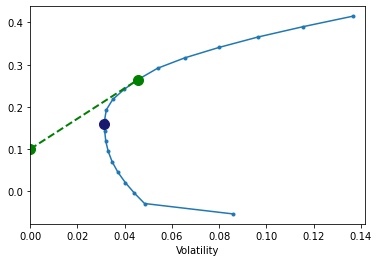

In [42]:
ax = ptk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)
ax.set_xlim(left = 0)
w_gmv = gmv(cov)
r_gmv = ptk.portfolio_ret(w_gmv, er)
vol_gmv = ptk.portfolio_vol(w_gmv, cov)
# add GMV
ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize=10)

Now let's add both to the toolkit

<AxesSubplot:xlabel='Volatility'>

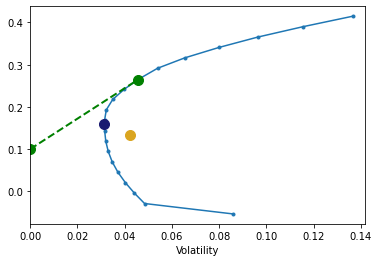

In [47]:
ptk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)